# Fifa Data Insight:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt,seaborn as sns,os
from IPython.display import display
df = pd.read_csv("WorldCupMatches.csv")
df.shape

(4572, 20)

In [2]:
sns.set(rc={'figure.figsize':(16.7,4.27)})
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [3]:
df.head(5)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [4]:
df.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

### Checking the years for which we have the data

In [5]:
df['Year'].unique()

array([1930., 1934., 1938., 1950., 1954., 1958., 1962., 1966., 1970.,
       1974., 1978., 1982., 1986., 1990., 1994., 1998., 2002., 2006.,
       2010., 2014.,   nan])

##### Handling the missing Data

In [6]:
df = df.dropna()
#Fix the Date
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Date'] = pd.DatetimeIndex(df['Datetime']).day
df['Month'] = pd.DatetimeIndex(df['Datetime']).month

In [7]:
np.count_nonzero(df['Year'].unique())

20

In [8]:
#Add Winning Team Name
df['Winning Team'] = df['Home Team Name'][df['Home Team Goals'] > df['Away Team Goals']]
df['Winning Team'].loc[df['Winning Team'].isna()] = df['Away Team Name'][df['Winning Team'].isna()]
df['Winning Team']

C:\Users\ragha\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


0           France
1              USA
2       Yugoslavia
3          Romania
4        Argentina
          ...     
847     Costa Rica
848        Germany
849      Argentina
850    Netherlands
851        Germany
Name: Winning Team, Length: 850, dtype: object

In [9]:
#replacing the Germany FR with Germany in Names of Participating Teams
df = df.replace("Germany FR","Germany")

In [10]:
#replacing country strings
df['Home Team Name'] = df['Home Team Name'].str.replace('rn">', '') #do not exist in worldcups df
df['Away Team Name'] = df['Away Team Name'].str.replace('rn">', '')

In [11]:
df.sample(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Date,Month,Winning Team
681,2006.0,2006-06-21 16:00:00,Group D,"FIFA World Cup Stadium, Gelsenkirchen",Gelsenkirchen,Portugal,2.0,1.0,Mexico,,...,MICHEL Lubos (SVK),Roman SLYSKO (SVK),BALKO Martin (SVK),97410100.0,97410039.0,POR,MEX,21,6,Portugal
711,2010.0,2010-06-12 16:00:00,Group B,Ellis Park Stadium,Johannesburg,Argentina,1.0,0.0,Nigeria,,...,Wolfgang STARK (GER),SALVER Jan-Hendrik (GER),PICKEL Mike (GER),249722.0,300061460.0,ARG,NGA,12,6,Argentina
299,1978.0,1978-06-18 16:45:00,Group A,El Monumental - Estadio Monumental Antonio Ves...,Buenos Aires,Italy,1.0,0.0,Austria,,...,RION Francis (BEL),COEREZZA Norberto Angel (ARG),NDIAYE Youssou (SEN),279.0,2221.0,ITA,AUT,18,6,Italy
500,1994.0,1994-07-02 12:00:00,Round of 16,Soldier Field,Chicago,Germany,3.0,2.0,Belgium,,...,ROETHLISBERGER Kurt (SUI),LISTKIEWICZ Michal (POL),CHRISTENSEN Carl-Johan Meyer (DEN),338.0,3085.0,GER,BEL,2,7,Germany
197,1966.0,1966-07-26 19:30:00,Semi-finals,Wembley Stadium,London,England,2.0,1.0,Portugal,,...,SCHWINTE Pierre (FRA),YAMASAKI MALDONADO Arturo (MEX),ZECEVIC Konstantin (YUG),536.0,1635.0,ENG,POR,26,7,England
520,1998.0,1998-06-12 14:30:00,Group D,La Mosson,Montpellier,Paraguay,0.0,0.0,Bulgaria,,...,ALZEID Abdulrahman (KSA),SALIE Achmat (RSA),GHADANFARI Hussain (KUW),1014.0,8728.0,PAR,BUL,12,6,Bulgaria
683,2006.0,2006-06-21 21:00:00,Group C,"FIFA World Cup Stadium, Munich",Munich,C�te d'Ivoire,3.0,2.0,Serbia and Montenegro,,...,RODRIGUEZ Marco (MEX),CAMARGO Jose Luis (MEX),LEAL Leonel (CRC),97410100.0,97410038.0,CIV,SCG,21,6,C�te d'Ivoire
513,1994.0,1994-07-13 16:30:00,Semi-finals,Rose Bowl,Los Angeles,Sweden,0.0,1.0,Brazil,,...,TORRES CADENA Jose Joaquin (COL),MARTON Sandor (HUN),MATTHYS Luc (BEL),3461.0,3099.0,SWE,BRA,13,7,Brazil
727,2010.0,2010-06-17 20:30:00,Group A,Peter Mokaba Stadium,Polokwane,France,0.0,2.0,Mexico,,...,AL GHAMDI Khalil (KSA),KAMRANIFAR Hassan (IRN),AL MARZOUQI Saleh (UAE),249722.0,300061451.0,FRA,MEX,17,6,Mexico
482,1994.0,1994-06-24 19:30:00,Group B,Pontiac Silverdome,Detroit,Sweden,3.0,1.0,Russia,,...,QUINIOU Joel (FRA),FANAEI Mohammad (IRN),HASSAN Abdel-Magid (EGY),337.0,3068.0,SWE,RUS,24,6,Sweden


In [12]:
df.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials',
       'Date', 'Month', 'Winning Team'],
      dtype='object')

# Fifa Data Insights
- Team with Most Wins in FIFA
- Top 10 Teams in Fifa (All Years)
- Team that Reached the Finals the most
- Team with Most Goals Year-Wise
- Team with Most Goals (All Year Inclusive)

In [13]:
#List of Teams that Reached Finals
ListofTeams= pd.concat([df['Home Team Name'] , df['Away Team Name'] ])
ListofTeamsUnique = ListofTeams.drop_duplicates()
ListofTeamsUnique

0                 France
1                    USA
2             Yugoslavia
3                Romania
4              Argentina
             ...        
19                 Egypt
36     Dutch East Indies
201               Israel
207          El Salvador
318               Kuwait
Length: 82, dtype: object

List of Teams that Ever Reached Finals in Fifa Tournaments

In [14]:
#List of teams Reaching Finals,
ListofTeams.value_counts()

Germany                  108
Brazil                   108
Italy                     83
Argentina                 81
England                   62
                        ... 
Haiti                      3
Serbia and Montenegro      3
China PR                   3
Zaire                      3
Dutch East Indies          1
Length: 82, dtype: int64

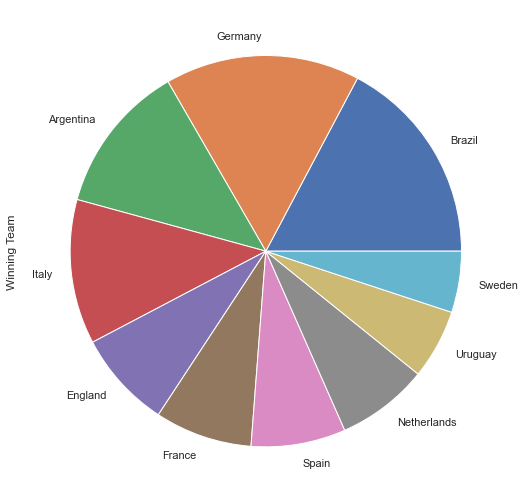

In [15]:
topten_teams = df['Winning Team'].value_counts().nlargest(10).plot(kind='pie')

Above you can see the list of teams that reached Fifa Tournament's Final Stage, and how many times was that done. as we can see clealy, Germany was the Best Performing team as they reached Finals with a success rate of 9/20.

In [16]:
FinalsWinData = pd.DataFrame(ListofTeams.value_counts(),columns=['Count'])
FinalsWinData['Wins'] = df['Winning Team'][df['Stage'] == 'Final'].value_counts()
FinalsWinData.fillna(0,inplace=True)
FinalsWinData['Wins'] = FinalsWinData['Wins'].astype('int32')
FinalsWinData

,Count,Wins
Germany,108,5
Brazil,108,4
Italy,83,4
Argentina,81,2
England,62,1
...,...,...
Haiti,3,0
Serbia and Montenegro,3,0
China PR,3,0
Zaire,3,0


<AxesSubplot:ylabel='Wins'>

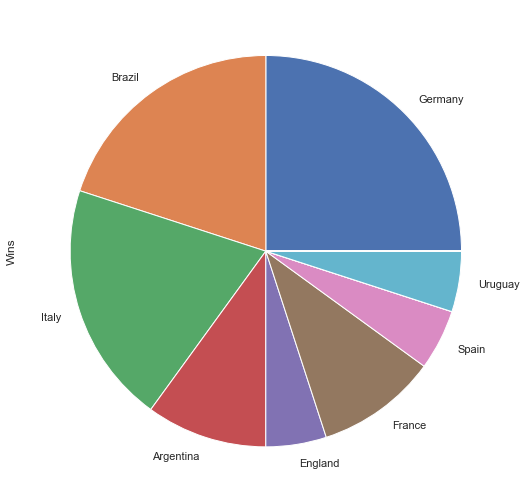

In [17]:
FinalsWinData['Wins'].plot(kind="pie")

In [31]:
dfCompact = df[['Year','Home Team Name','Home Team Goals','Away Team Name','Away Team Goals']]
TeamList = pd.concat([dfCompact['Home Team Name'],dfCompact['Away Team Name']]).reset_index(drop=True)
GoalList = pd.concat([dfCompact['Home Team Goals'],dfCompact['Away Team Goals']]).reset_index(drop=True)
YearList = pd.concat([df["Year"],df['Year']]).reset_index(drop=True)

In [62]:
df3= pd.DataFrame(data={'Year': YearList,'Team': TeamList,'Goals': GoalList})
df3 = df3.groupby(['Year','Team']).apply(lambda df: df.loc[:,['Goals']].sum())
df3

Goals
Year   Team              
1930.0 Argentina     18.0
       Belgium        0.0
       Bolivia        0.0
       Brazil         5.0
       Chile          5.0
...                   ...
2014.0 Russia         2.0
       Spain          4.0
       Switzerland    7.0
       USA            6.0
       Uruguay        4.0

[427 rows x 1 columns]

In [63]:
HighestGoalsEachYear =  df3.sort_values(by=['Goals',"Year"],ascending=False).reset_index(level=[1])
HighestGoalsEachYear = HighestGoalsEachYear[~HighestGoalsEachYear.index.duplicated(keep='first')]

In [66]:
HighestGoalsEachYear.sort_index()

,Team,Goals
Year,,
1930.0,Argentina,18.0
1934.0,Italy,12.0
1938.0,Hungary,15.0
1950.0,Brazil,22.0
1954.0,Hungary,27.0
1958.0,France,23.0
1962.0,Brazil,14.0
1966.0,Portugal,17.0
1970.0,Brazil,19.0


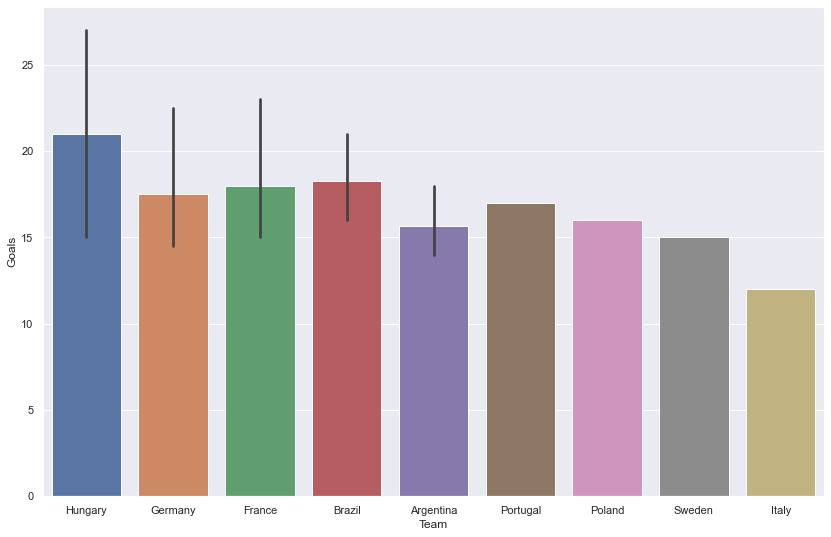

In [67]:
bp = sns.barplot(x="Team",y="Goals",data=HighestGoalsEachYear)

Above Table Shows the team with Most goals in each Fifa tournament ever held. duplicates are hidden :p

## Countries with Most Goals (All Seasons Inclusive):

In [22]:
HomeTeamGoals = dfCompact[['Home Team Name','Home Team Goals']].dropna()
HomeTeamGoals.columns = ['Countries','Goals']
AwayTeamGoals = dfCompact[['Away Team Name','Away Team Goals']].dropna()
AwayTeamGoals.columns = HomeTeamGoals.columns
totalGoals = pd.concat([HomeTeamGoals,AwayTeamGoals],axis='rows',ignore_index=True)
totalGoals = totalGoals.groupby('Countries',as_index=False).sum()
totalGoals = totalGoals.sort_values('Goals',ascending = False)
totalGoals

,Countries,Goals
29,Germany,231.0
8,Brazil,225.0
2,Argentina,133.0
39,Italy,128.0
27,France,108.0
...,...,...
22,Dutch East Indies,0.0
13,China PR,0.0
72,Trinidad and Tobago,0.0
11,Canada,0.0


<AxesSubplot:xlabel='Countries', ylabel='Goals'>

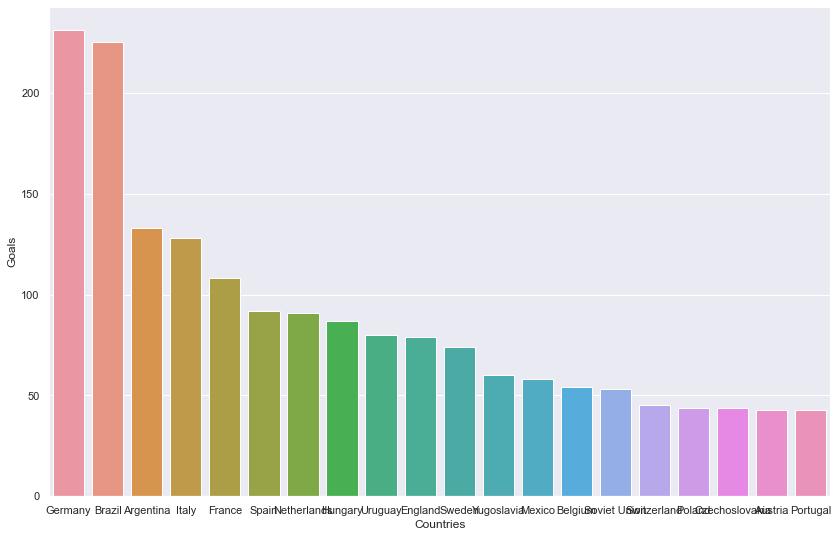

In [23]:
sns.barplot(x="Countries",y="Goals",data = totalGoals[:20])